In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Лабораторные работы по машинному обучению выполнены на языке Python**


1.   Изучение методов предсказания значений временных рядов
2. NLP для классификации отзывов

# Временные ряды

## Простые методы предсказания (СС, ЭСС, модель Хольта)

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

Инициализация данных

In [ ]:
data = {'Месяц': np.arange(1, 31),
        'Yt': [237, 241, 274, 228, 222, 193, 217, 226, 238, 295, 274, 298, 303, 318, 353, 306, 310, 279,
           319, 327, 365, 323, 321, 296, 323, 336, 351, 411, 394, 420]}
df = pd.DataFrame(data)
df.set_index('Месяц', inplace=True)

In [ ]:
df['Завтра будет как вчера'] = df['Yt'].shift(1)
df['Скользящее среднее'] = df['Yt'].shift(1).expanding().mean()
MSE = []
MAE = []
res1 = df['Yt'] - df['Завтра будет как вчера']
MSE.append(np.sum(res1 ** 2) / len(df))
MAE.append(np.sum(abs(res1)) / len(df))
res2 = df['Yt'] - df['Скользящее среднее']
MSE.append(np.sum(res2 ** 2) / len(df))
MAE.append(np.sum(abs(res2)) / len(df))

# ЭСС
alphas = [0.1, 0.3, 0.5, 0.8]
for alpha in alphas:
    df[f'ЭСС_{alpha}'] = df['Yt'].ewm(alpha=alpha, adjust=False).mean()

    residuals = df['Yt'] - df[f'ЭСС_{alpha}']
    MSE.append(np.sum(residuals ** 2) / len(df))
    MAE.append(np.sum(abs(residuals)) / len(df))

# модель Хольта
a1, a2 = 0.2, 0.3
holt_model = Holt(df['Yt']).fit(smoothing_level=a1, smoothing_trend=a2)
df['Хольт'] = holt_model.fittedvalues
res3 = df['Yt'] - df['Хольт']
MSE.append(np.sum(res3 ** 2) / len(df))
MAE.append(np.sum(abs(res3)) / len(df))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
MSE

[833.8333333333334,
 3458.971879082428,
 1940.4990639197315,
 574.0680785892106,
 228.18939772485066,
 31.915770860068125,
 988.5068214776218]

In [ ]:
MAE

[23.833333333333332,
 48.595980001812535,
 35.78795454558984,
 18.99081159103848,
 12.619951362535357,
 4.715440822728932,
 25.721105525102093]

In [ ]:
df.columns

Index(['Yt', 'Завтра будет как вчера', 'Скользящее среднее', 'ЭСС_0.1',
       'ЭСС_0.3', 'ЭСС_0.5', 'ЭСС_0.8', 'Хольт'],
      dtype='object')

In [ ]:
col = ['Завтра будет как вчера', 'Скользящее среднее', 'ЭСС_0.1',
       'ЭСС_0.3', 'ЭСС_0.5', 'ЭСС_0.8', 'Хольт']
df = pd.DataFrame({'Модель': col, 'МНК': MSE})
df

,Модель,МНК
0,Завтра будет как вчера,833.833333
1,Скользящее среднее,3458.971879
2,ЭСС_0.1,1940.499064
3,ЭСС_0.3,574.068079
4,ЭСС_0.5,228.189398
5,ЭСС_0.8,31.915771
6,Хольт,1336.400041


In [ ]:
df.head(20)

,Yt,Завтра будет как вчера,Скользящее среднее,ЭСС_0.1,ЭСС_0.3,ЭСС_0.5,ЭСС_0.8,Хольт
Месяц,,,,,,,,
1,237,NaN,NaN,237.000000,237.000000,237.000000,237.000000,241.000000
2,241,237.0,237.000000,237.400000,238.200000,239.000000,240.200000,243.960000
3,274,241.0,239.000000,241.060000,248.940000,256.500000,267.240000,246.950400
4,228,274.0,250.666667,239.754000,242.658000,242.250000,235.848000,257.565696
5,222,228.0,245.000000,237.978600,236.460600,232.125000,224.769600,255.083991
6,193,222.0,240.400000,233.480740,223.422420,212.562500,199.353920,249.913588
7,217,193.0,232.500000,231.832666,221.495694,214.781250,213.470784,236.562450
8,226,217.0,230.285714,231.249399,222.846986,220.390625,223.494157,229.507792
9,238,226.0,229.750000,231.924459,227.392890,229.195312,235.098831,225.453599


In [ ]:
df.to_excel("lel2.xlsx", index=False)

## Модели Уинтерса, Тейла-Вейджа с лин. и экс. трендами, Регрессия

Данные по часовому онлайну игроков в одной из онлайн игр

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### Загрузка данных

In [ ]:
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/hour_online.csv"
data = pd.read_csv(url)
data['Time'] = pd.to_datetime(data['Time'])
data.sort_values('Time', inplace=True)

<ipython-input-2-8599cfbb6429>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


In [ ]:
print("\nКоличество пропусков данных:\n",data.isna().sum())


Количество пропусков данных:
 Time     0
Users    0
dtype: int64


In [ ]:
def show(data):
    plt.figure(figsize=(15,7))
    plt.plot(data['Time'],data['Users'])
    plt.show()

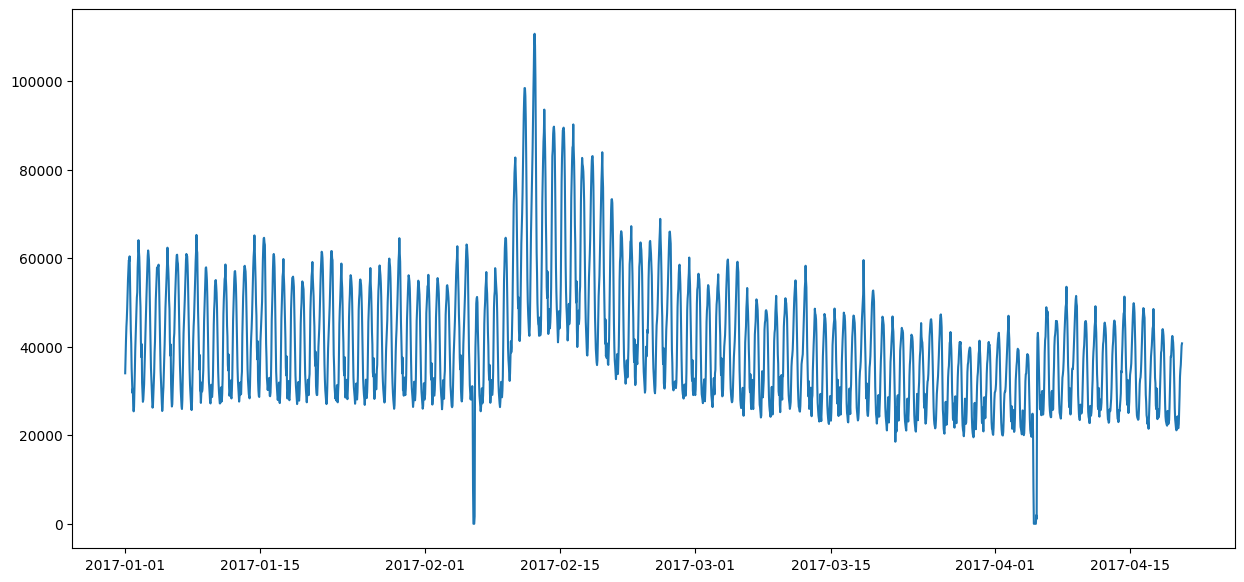

In [ ]:
show(data)

In [ ]:
# избавимся от выбросов
data_without_zero = data[data['Users'] > 10000]
data_without_zero.reset_index(drop=True, inplace=True) # сбросим индексы для обеспечения непрерывности индексов и исключения возникновений ошибок

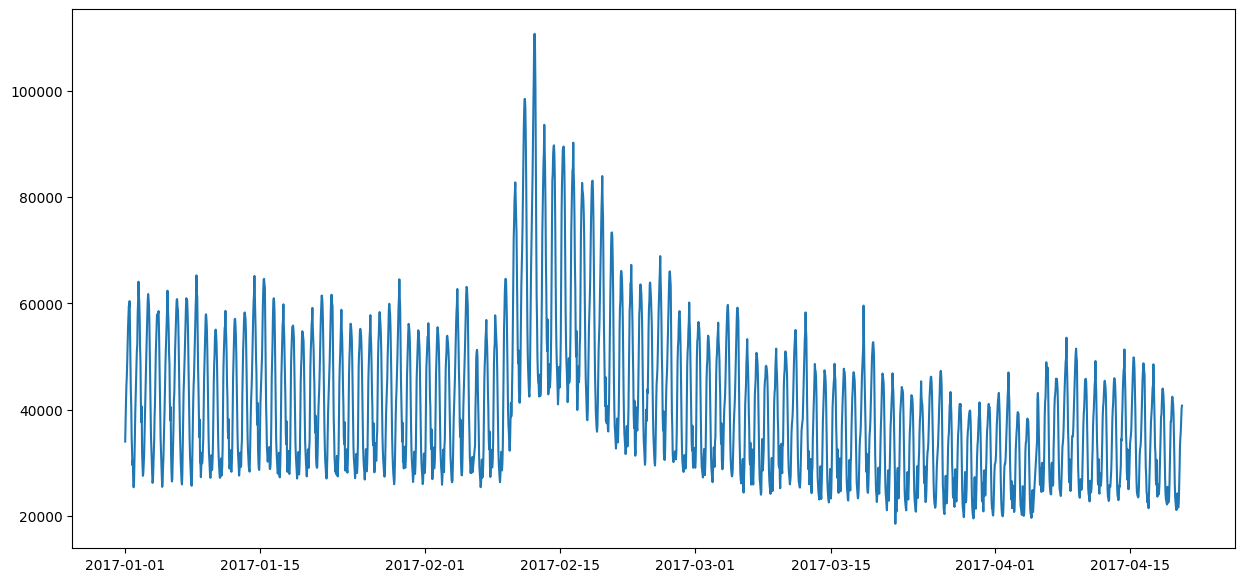

In [ ]:
show(data_without_zero)

### Поиск трендов в данных с помощью скользящего среднего

Недельное сглаживание хорошо отражает общие изменения, связанные с
резким ростом числа активных игроков в феврале и последующим снижением в марте

In [ ]:
def plotMovingAverage(data, n, confidence_intervals=False):
#  n - rolling window size

  rolling_mean = data.rolling(window=n).mean()

  plt.figure(figsize=(15,5))
  plt.title("Moving average\n Window size = {}".format(n))
  plt.plot(rolling_mean, "orange", label="Скользящее среднее", linewidth=2)
  plt.plot(data, label="Данные")
  plt.legend(title = '', loc = 'upper right')

  if confidence_intervals:     # Доверительные интервалы для сглаженных значений
    rolling_std = data.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = rolling_mean-1.96*rolling_std

    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")

  plt.grid(True)

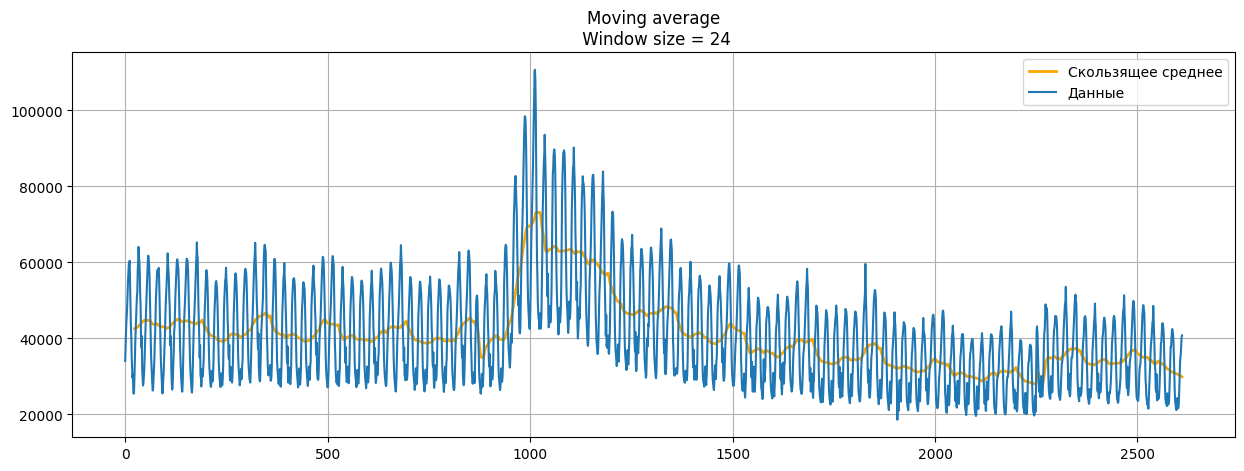

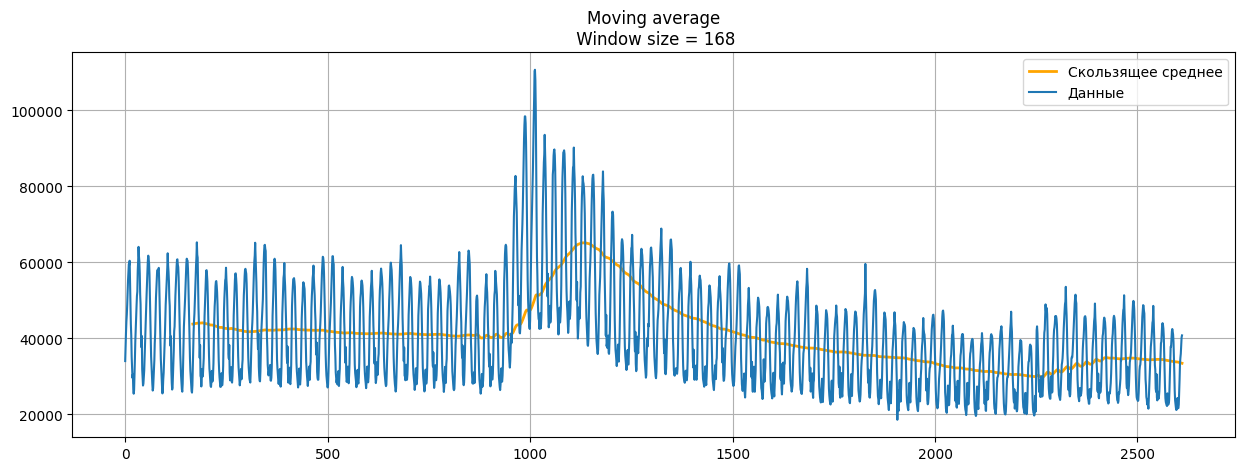

In [ ]:
plotMovingAverage(data_without_zero['Users'], 24) # сглаживаем по дням
plotMovingAverage(data_without_zero['Users'], 24*7) # сглаживаем по неделям

### Простое экспоненциальное сглаживание (ЭСС)

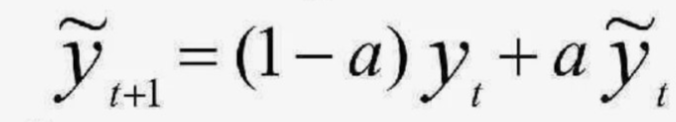

In [ ]:
def exponential_smoothing_alpha(data, alpha):
    result = [data[0]]
    for n in range(1, len(data)):
        result.append(alpha * data[n] + (1 - alpha) * result[n-1])
    return result

def exponential_smoothing(data, alpha_coefs=[0.3, 0.05]):
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(15, 7))

        for alpha in alpha_coefs:
            plt.plot(exponential_smoothing_alpha(data, alpha), label="Alpha = {}".format(alpha), linewidth=2)

        plt.plot(data.values, "c", label = "Данные")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True)

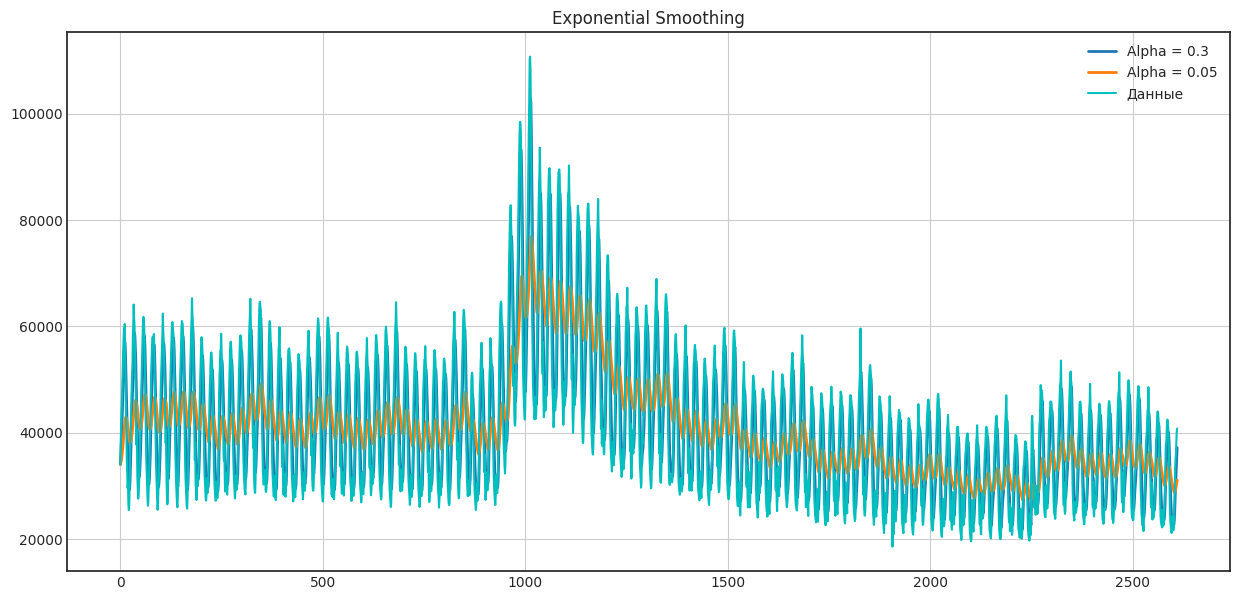

In [ ]:
exponential_smoothing(data_without_zero.Users)

### Двойное экспоненциальное сглаживание (Модель Хольта)

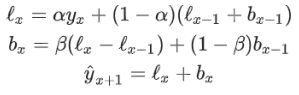

In [ ]:
def double_exponential_smoothing_alpha_beta(data, alpha, beta):
    result = [data[0]]
    for n in range(1, len(data)+1):
      if n == 1:
        level, trend = data[0], data[1] - data[0]
      if n >= len(data): # прогнозируем
        value = result[-1]
      else:
        value = data[n]
      last_level, level = level, alpha*value + (1-alpha)*(level+trend)
      trend = beta*(level-last_level) + (1-beta)*trend
      result.append(level+trend)
    return result

def double_exponential_smoothing(data, alpha_coefs=[0.9, 0.02], beta_coefs=[0.9, 0.02]):
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(15, 7))
        for alpha in alpha_coefs:
            for beta in beta_coefs:
                plt.plot(double_exponential_smoothing_alpha_beta(data, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(data.values, label = "Данные")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

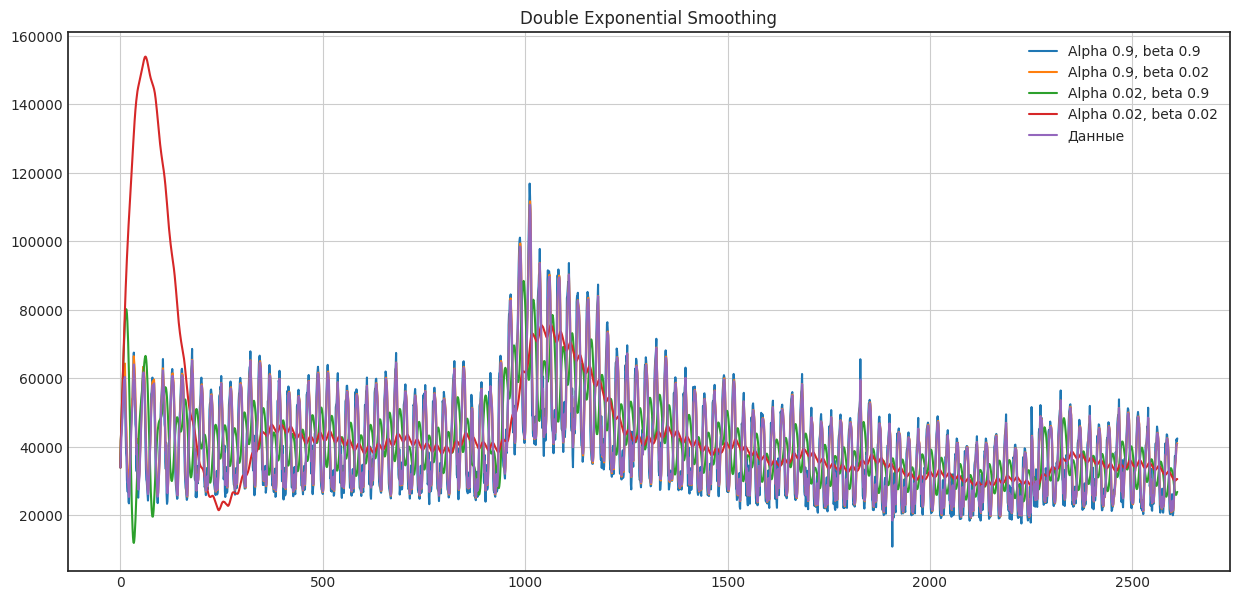

In [ ]:
double_exponential_smoothing(data_without_zero.Users)

### Тройное экспоненциальное сглаживание (Модель Тейла–Вейджа)

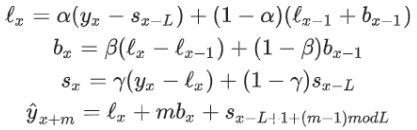

In [ ]:
class TheilWage:

 #Модель Тейла-Вейджа с методом Брутлага для детектирования аномалий

 # series - исходный временной ряд
 # slen - длина сезона
 # alpha, beta, gamma - коэффициенты модели Тейла-Вейджа
 # n_preds - горизонт предсказаний
 # scaling_factor - задаёт ширину доверительного интервала по Брутлагу (обычно принимает значения от 2 до 3)

  def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
    self.series = series
    self.slen = slen
    self.alpha = alpha
    self.beta = beta
    self.gamma = gamma
    self.n_preds = n_preds
    self.scaling_factor = scaling_factor
  def initial_trend(self):
    sum = 0.0
    for i in range(self.slen):
      sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
    return sum / self.slen
  def initial_seasonal_components(self):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(self.series)/self.slen)
 # вычисляем сезонные средние
    for j in range(n_seasons):
      season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
 # вычисляем начальные значения
    for i in range(self.slen):
      sum_of_vals_over_avg = 0.0
      for j in range(n_seasons):
        sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
      seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

  def triple_exponential_smoothing(self):
    self.result = []
    self.Smooth = []
    self.Season = []
    self.Trend = []
    self.PredictedDeviation = []
    self.UpperBond = []
    self.LowerBond = []
    seasonals = self.initial_seasonal_components()
    for i in range(len(self.series)+self.n_preds):
      if i == 0: # инициализируем значения компонент
        smooth = self.series[0]
        trend = self.initial_trend()
        self.result.append(self.series[0])
        self.Smooth.append(smooth)
        self.Trend.append(trend)
        self.Season.append(seasonals[i%self.slen])
        self.PredictedDeviation.append(0)
        self.UpperBond.append(self.result[0] +
                              self.scaling_factor *
                              self.PredictedDeviation[0])
        self.LowerBond.append(self.result[0] -
                              self.scaling_factor *
                              self.PredictedDeviation[0])
        continue
      if i >= len(self.series): # прогнозируем
        m = i - len(self.series) + 1
        self.result.append((smooth + m*trend) + seasonals[i%self.slen])
        self.UpperBond.append(self.result[-1] +self.scaling_factor *  self.PredictedDeviation[-1])
        self.LowerBond.append(self.result[-1] - self.scaling_factor * self.PredictedDeviation[-1])
 # во время прогноза с каждым шагом увеличиваем неопределенность
        self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01)
      else:
        val = self.series[i]
        last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen])+(1-self.alpha)*(smooth+trend)
        trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
        seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
        self.result.append(smooth+trend+seasonals[i%self.slen])
 # Отклонение рассчитывается в соответствии с алгоритмом Брутлага
        self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] -
        self.result[i]) + (1-self.gamma)*self.PredictedDeviation[-1])
        self.UpperBond.append(self.result[-1] +self.scaling_factor *  self.PredictedDeviation[-1])
        self.LowerBond.append(self.result[-1] - self.scaling_factor * self.PredictedDeviation[-1])
        self.Smooth.append(smooth)
        self.Trend.append(trend)
        self.Season.append(seasonals[i % self.slen])

cross-validation on a rolling basis - кроссвалидация на скользящем окне.


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(x):
    errors = []   # вектор ошибок
    values = data.values
    alpha, beta, gamma = x


  # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    tscv = TimeSeriesSplit(n_splits=3)
    for train, test in tscv.split(values):
        model = TheilWage(series=values[train], slen = 24*7, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test)) # используем Модель Тейла-Вейджа
        model.triple_exponential_smoothing()
        predictions = model.result[-len(test):]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)

  # Возвращаем средний квадрат ошибки по вектору ошибок
    return np.mean(np.array(errors))

In [ ]:
data = data.Users[:-500] # отложим часть данных для тестирования
data = data.to_frame(name='Users')

In [ ]:
# значения сглаживающих параметров
x = [0, 0, 0]

opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = ((0, 1), (0, 1), (0, 1))) # Минимизируем функцию потерь с ограничениями на параметры
alpha_final, beta_final, gamma_final = opt.x

print("Найденные оптимальные параметры: ",alpha_final, beta_final, gamma_final)

TheilWage_coef=opt.x

Найденные оптимальные параметры:  0.006635880294816432 0.0 0.046569454900318885


Потренируем модель с найденными параметрами

In [ ]:
def plotTheilWage(data):
    Anomalies = np.array([np.NaN]*len(data))
    Anomalies[data.values<model.LowerBond] = data.values[data.values<model.LowerBond]
    plt.figure(figsize=(25, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
    plt.plot(model.LowerBond, "r--", alpha=0.5)
    plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, y2=model.LowerBond, alpha=0.5, color = "grey")
    plt.plot(data.values, label = "Actual")
    plt.plot(Anomalies, "o", markersize=10, label = "Anomalies")
    plt.axvspan(len(data)-128, len(data), alpha=0.5, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

MSE модели Тейла-Вейджа с параметрами 0.006635880294816432 0.0 0.046569454900318885:
 7511.698511387652


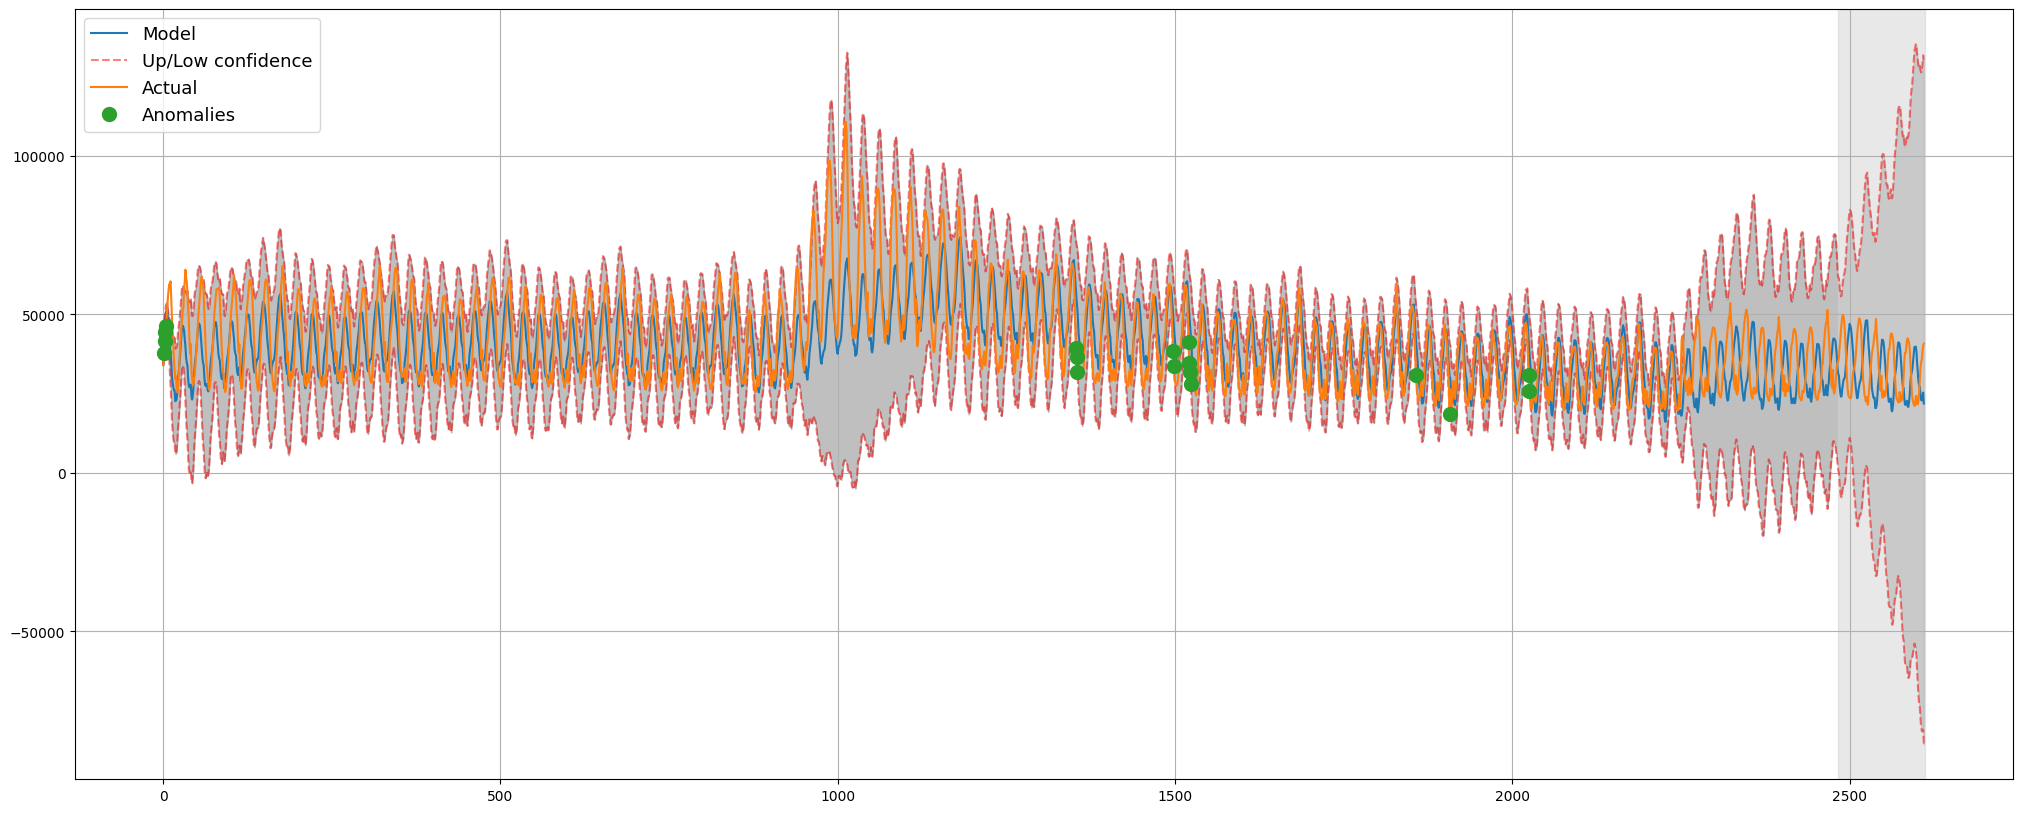

In [ ]:
from sklearn.metrics import mean_absolute_error

model = TheilWage(data_without_zero.Users[:-128], slen = 24*7, alpha = alpha_final, beta = beta_final, gamma = gamma_final, n_preds = 128, scaling_factor = 2.56)
model.triple_exponential_smoothing()

result_error = mean_absolute_error(data_without_zero.Users.values,model.result)
print(f'MSE модели Тейла-Вейджа с параметрами {alpha_final} {beta_final} {gamma_final}:\n', result_error)


plotTheilWage(data_without_zero.Users)

### Модель Уинтерса (Хольта-Винтерса)

Трёхпараметрическая модель прогноза, которая учитывает:
- сглаженный экспоненциальный ряд
- тренд
- сезонность

Можно просто:

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(y, trend='add', seasonal='add', seasonal_periods=24)

In [ ]:
class Winters:
  def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
    self.series = series
    self.slen = slen
    self.alpha = alpha
    self.beta = beta
    self.gamma = gamma
    self.n_preds = n_preds
    self.scaling_factor = scaling_factor


  def initial_trend(self):
    sum = 0.0
    for i in range(self.slen):
      sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
    return sum / self.slen



  def initial_seasonal_components(self):
    seasonals = {}
    for i in range(self.slen):

      seasonals[i-self.slen] = 1
    return seasonals

  def triple_smoothing(self):
    self.result_l = []
    self.Smooth_l = []
    self.Season_l = []
    self.Trend_l = []
    self.PredictedDeviation_l = []
    self.UpperBond_l = []
    self.LowerBond_l = []

    seasonals = self.initial_seasonal_components()
    for i in range(len(self.series)+self.n_preds):
      if i == 0: # инициализируем значения компонент
        smooth = self.series[0]
        trend = self.initial_trend()
        seasonals[i]=self.gamma*(self.series[0]/smooth) + (1-self.gamma)*seasonals[i-self.slen]

        self.result_l.append(self.series[0])
        self.Smooth_l.append(smooth)
        self.Trend_l.append(trend)
        self.Season_l.append(seasonals[i])
        self.PredictedDeviation_l.append(0)
        self.UpperBond_l.append(self.result_l[0] + self.scaling_factor * self.PredictedDeviation_l[0])
        self.LowerBond_l.append(self.result_l[0] - self.scaling_factor *self.PredictedDeviation_l[0])

        continue
      if i >= len(self.series): # прогнозируем
        m = i - len(self.series) + 1
        self.result_l.append((smooth + m*trend)* seasonals[len(self.series)-1+m%self.slen-self.slen])
        self.PredictedDeviation_l.append(self.PredictedDeviation_l[-1]*1.01)

      else:
        val = self.series[i]
        last_smooth, smooth = smooth, self.alpha*(val/seasonals[i-self.slen])+(1-self.alpha)*(smooth+trend)
        trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
        seasonals[i] = self.gamma*(val/smooth) + (1-self.gamma)*seasonals[i-self.slen]
        self.result_l.append((smooth+trend)*seasonals[i-self.slen])
        self.PredictedDeviation_l.append(self.gamma * np.abs(self.series[i] - self.result_l[i]) + (1 - self.gamma)*self.PredictedDeviation_l[-1])

      self.UpperBond_l.append(self.result_l[-1] + self.scaling_factor * self.PredictedDeviation_l[-1])
      self.LowerBond_l.append(self.result_l[-1] - self.scaling_factor * self.PredictedDeviation_l[-1])
      self.Smooth_l.append(smooth)
      self.Trend_l.append(trend)
      self.Season_l.append(seasonals[i % self.slen])

  def smoothing(self):
    self.result = []
    self.Smooth = []
    self.Season = []
    self.Trend = []
    self.PredictedDeviation = []
    self.UpperBond = []
    self.LowerBond = []

    seasonals = self.initial_seasonal_components()
    for i in range(len(self.series)+self.n_preds):
      if i == 0: # инициализируем значения компонент
        smooth = self.series[0]

        seasonals[i]=self.gamma*(self.series[0]/smooth) + (1-self.gamma)*seasonals[i-self.slen]

        self.result.append(self.series[0])
        self.Smooth.append(smooth)
        self.Season.append(seasonals[i])
        self.PredictedDeviation.append(0)
        self.UpperBond.append(self.result[0] + self.scaling_factor * self.PredictedDeviation[0])
        self.LowerBond.append(self.result[0] - self.scaling_factor *self.PredictedDeviation[0])

        continue
      if i >= len(self.series): # прогнозируем
        m = i - len(self.series) + 1
        self.result.append(smooth * seasonals[len(self.series)-1+m%self.slen-self.slen])
        self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01)

      else:
        val = self.series[i]
        last_smooth, smooth = smooth, self.alpha*(val/seasonals[i-self.slen])+(1-self.alpha)*smooth

        seasonals[i] = self.gamma*(val/smooth) + (1-self.gamma)*seasonals[i-self.slen]
        self.result.append(smooth*seasonals[i-self.slen])


        self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) + (1 - self.gamma)*self.PredictedDeviation[-1])

      self.UpperBond.append(self.result[-1] + self.scaling_factor * self.PredictedDeviation[-1])
      self.LowerBond.append(self.result[-1] - self.scaling_factor * self.PredictedDeviation[-1])
      self.Smooth.append(smooth)
      self.Season.append(seasonals[i % self.slen])

  def triple_exponential_smoothing(self):
    self.result_ex = []
    self.Smooth_ex = []
    self.Season_ex = []
    self.Trend_ex = []
    self.PredictedDeviation_ex = []
    self.UpperBond_ex = []
    self.LowerBond_ex = []

    seasonals = self.initial_seasonal_components()
    for i in range(len(self.series)+self.n_preds):
      if i == 0: # инициализируем значения компонент
        smooth = self.series[0]
        trend = self.initial_trend()
        seasonals[i]=self.gamma*(self.series[0]/smooth) + (1-self.gamma)*seasonals[i-self.slen]

        self.result_ex.append(self.series[0])
        self.Smooth_ex.append(smooth)
        self.Trend_ex.append(trend)
        self.Season_ex.append(seasonals[i])
        self.PredictedDeviation_ex.append(0)
        self.UpperBond_ex.append(self.result_ex[0] + self.scaling_factor * self.PredictedDeviation_ex[0])
        self.LowerBond_ex.append(self.result_ex[0] - self.scaling_factor *self.PredictedDeviation_ex[0])

        continue
      if i >= len(self.series): # прогнозируем
        m = i - len(self.series) + 1
        self.result_ex.append((smooth * trend**m )* seasonals[len(self.series)-1+m%self.slen-self.slen])
        self.PredictedDeviation_ex.append(self.PredictedDeviation_ex[-1]*1.01)

      else:
        val = self.series[i]
        last_smooth, smooth = smooth, self.alpha*(val/seasonals[i-self.slen])+(1-self.alpha)*(smooth*trend)
        trend = self.gamma * (smooth/last_smooth) + (1-self.gamma)*trend

        seasonals[i] = self.beta*(val/smooth) + (1-self.beta)*seasonals[i-self.slen]
        self.result_ex.append((smooth*trend)*seasonals[i-self.slen])


        self.PredictedDeviation_ex.append(self.gamma * np.abs(self.series[i] - self.result_ex[i]) + (1 - self.gamma)*self.PredictedDeviation_ex[-1])

      self.UpperBond_ex.append(self.result_ex[-1] + self.scaling_factor * self.PredictedDeviation_ex[-1])
      self.LowerBond_ex.append(self.result_ex[-1] - self.scaling_factor * self.PredictedDeviation_ex[-1])
      self.Smooth_ex.append(smooth)
      self.Trend_ex.append(trend)
      self.Season_ex.append(seasonals[i%self.slen])

In [ ]:
def timeseriesCVscoreLW(x):
    errors = [] # вектор ошибок
    values = data.values
    alpha, beta, gamma = x

# идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    tscv = TimeSeriesSplit(n_splits=3)
    for train, test in tscv.split(values):
        model = Winters(series=values[train], slen = 24*7, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))

        # model.triple_smoothing()                   # тройное сглаж
        model.smoothing()                            # линейный тренд
        # model.triple_exponential_smoothing()       # экс. сглаж

        # predictions = model.result_l[-len(test):]  # тройное сглаж
        predictions = model.result[-len(test):]      # линейный тренд
        # predictions = model.result_ex[-len(test):] # экс. сглаж
        actual = values[test]

        if np.isnan(predictions[0]):
            error=np.inf
        else:
            error = mean_squared_error(predictions, actual)
        errors.append(error)

# Возвращаем средний квадрат ошибки по вектору ошибок
    return np.mean(np.array(errors))

In [ ]:
# значения сглаживающих параметров
x = [0.0001, 0.0001, 0.0001]

opt = minimize(timeseriesCVscoreLW, x0=x, method="TNC", bounds = ((0.0001, 1), (0.0001, 1), (0.0001, 1))) # Минимизируем функцию потерь с ограничениями на параметры
alpha_final, beta_final, gamma_final = opt.x

print("Найденные оптимальные параметры: ",alpha_final, beta_final, gamma_final)

In [ ]:
def plotTheilWage(data):
  # Anomalies = np.array([np.NaN]*len(data))
  # Anomalies[data.values<model.LowerBond] = data.values[data.values<model.LowerBond]
  plt.figure(figsize=(25, 10))
  plt.plot(model.result_l, label = "Model")
  plt.plot(model.UpperBond_l, "r--", alpha=0.5, label = "Up/Low confidence")
  plt.plot(model.LowerBond_l, "r--", alpha=0.5)
  plt.fill_between(x=range(0,len(model.result_l)), y1=model.UpperBond_l, y2=model.LowerBond_l, alpha=0.5, color = "grey")
  plt.plot(data.values, label = "Actual")
  # plt.plot(Anomalies, "o", markersize=10, label = "Anomalies")
  plt.axvspan(len(data)-128, len(data), alpha=0.5, color='lightgrey')
  plt.grid(True)
  plt.legend(loc="best", fontsize=13);

Модель Уинтерса

MSE модели Уинтерса с параметрами 0.003275272817631514 0.0001 0.39625091153870606:
 6381.853311048079


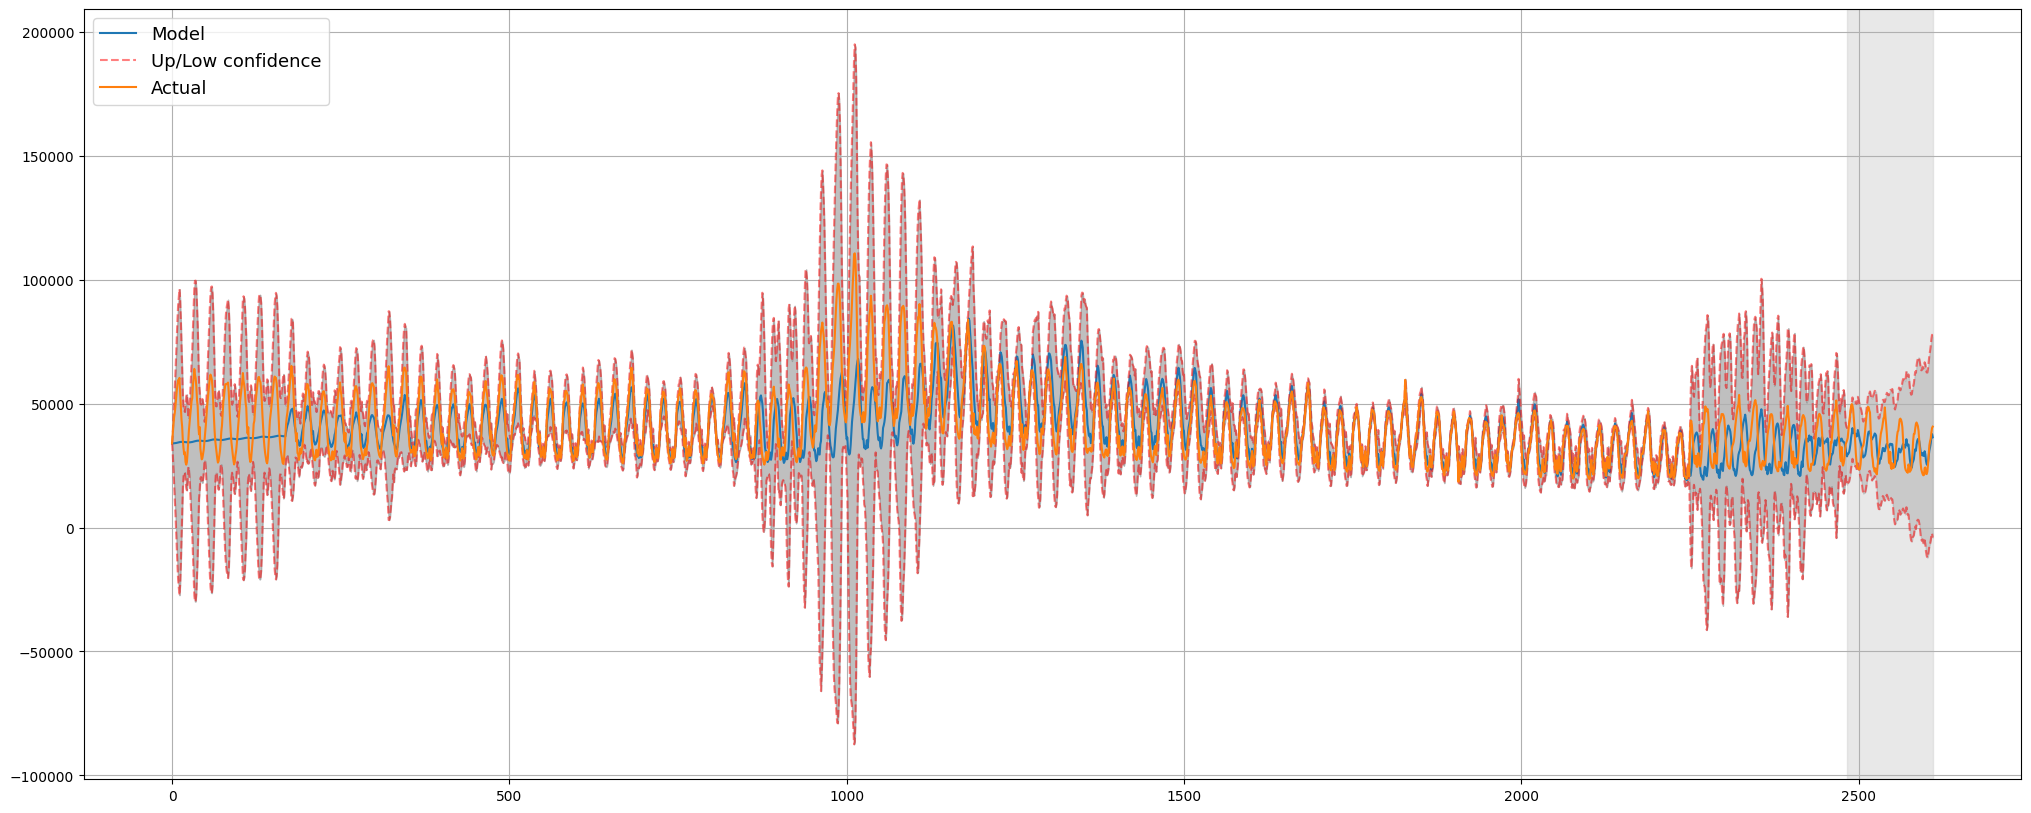

In [ ]:
from sklearn.metrics import mean_absolute_error

model = Winters(data_without_zero.Users[:-128], slen = 24*7, alpha = alpha_final, beta = beta_final, gamma = gamma_final, n_preds = 128, scaling_factor = 2.56)
model.triple_smoothing()

result_error = mean_absolute_error(data_without_zero.Users.values, model.result_l)
print(f'MSE модели Уинтерса с параметрами {alpha_final} {beta_final} {gamma_final}:\n', result_error)


plotTheilWage(data_without_zero.Users)

Модель Уинтерса с линейным трендом

MSE модели Уинтерса с параметрами 0.0036684818104683603 0.0001 0.2808990838954361:
 6940.317081642685


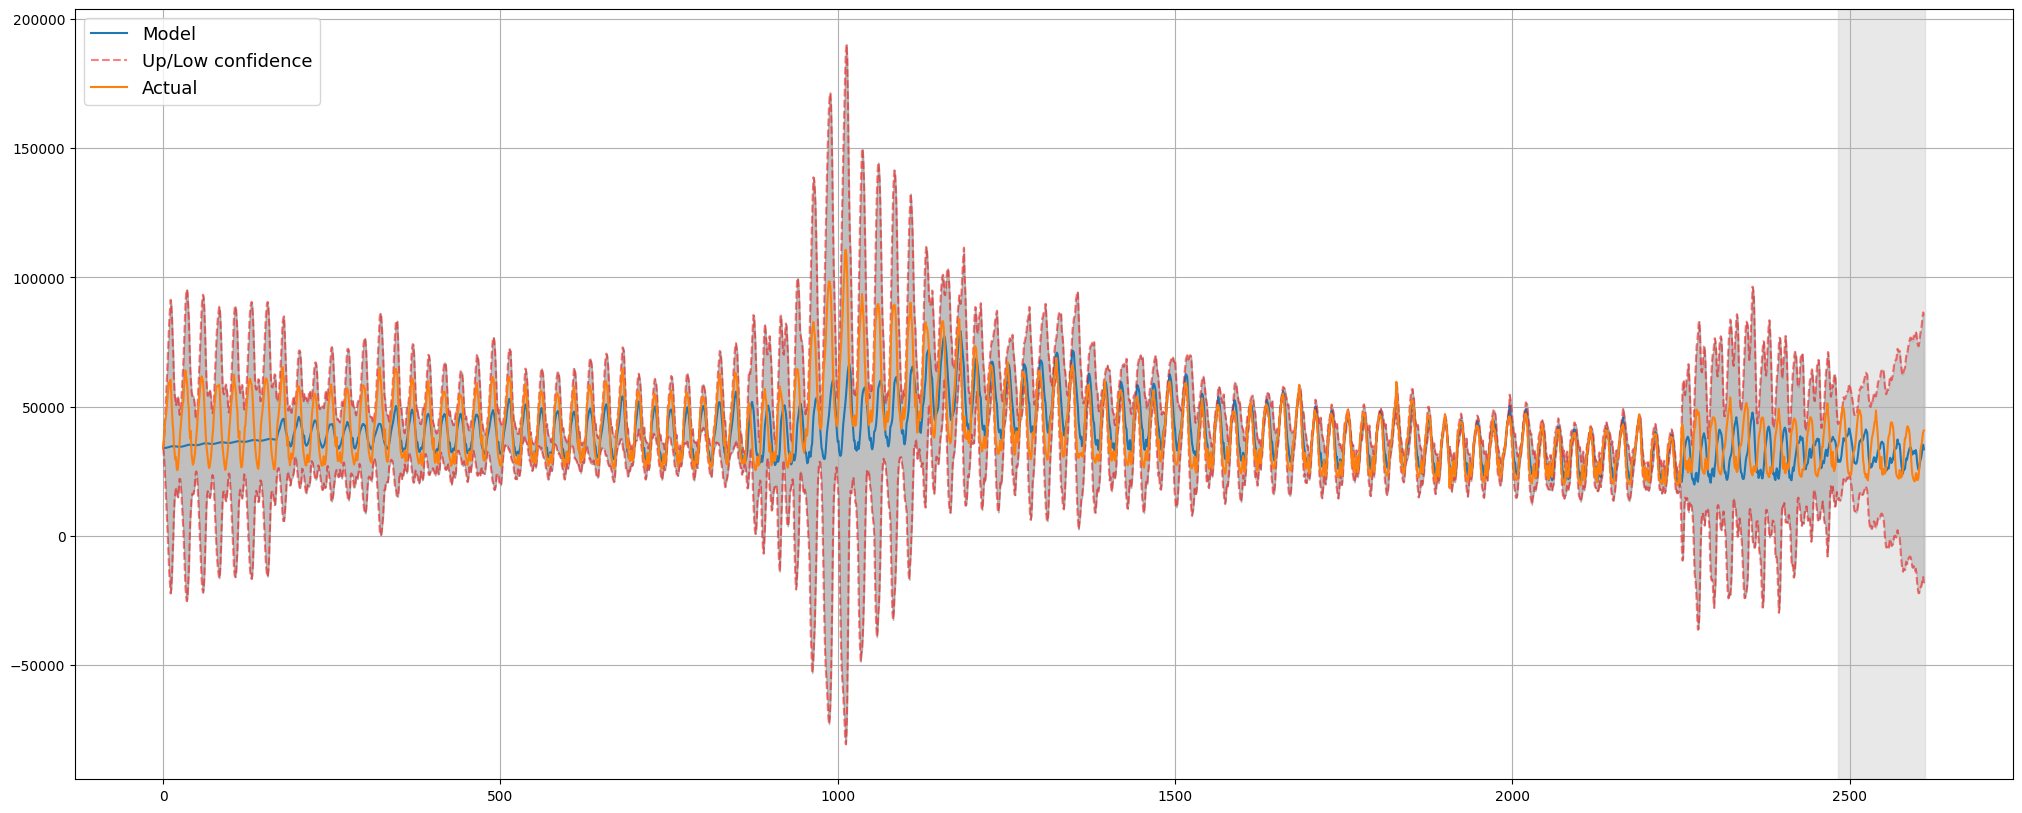

In [ ]:
# значения сглаживающих параметров
x = [0.0001, 0.0001, 0.0001]
opt = minimize(timeseriesCVscoreLW, x0=x, method="TNC", bounds = ((0.0001, 1), (0.0001, 1), (0.0001, 1))) # Минимизируем функцию потерь с ограничениями на параметры
alpha_final, beta_final, gamma_final = opt.x
print("Найденные оптимальные параметры: ",alpha_final, beta_final, gamma_final)


model = Winters(data_without_zero.Users[:-128], slen = 24*7, alpha = alpha_final, beta = beta_final, gamma = gamma_final, n_preds = 128, scaling_factor = 2.56)
model.triple_smoothing()
result_error = mean_absolute_error(data_without_zero.Users.values, model.result_l)
print(f'MSE модели Уинтерса с параметрами {alpha_final} {beta_final} {gamma_final}:\n', result_error)
plotTheilWage(data_without_zero.Users)

### Задача временных рядов, как задача РЕГРЕССИИ

In [ ]:
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


def transform_time(time_str):
    # dt = datetime.strptime(time_str, '%m/%d/%y %H:%M')
    return [time_str.year, time_str.month, time_str.day, time_str.hour]

# Преобразование столбца 'Time' на признаки
time_features = np.array([transform_time(x) for x in data_without_zero['Time']])


X = time_features
y = data_without_zero['Users'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Модель линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Модель Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Модель Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)


# Функция для расчета метрик и кросс-валидации
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    mse_train = mean_squared_error(y_train, train_preds)
    mse_test = mean_squared_error(y_test, test_preds)
    mae_train = mean_absolute_error(y_train, train_preds)
    mae_test = mean_absolute_error(y_test, test_preds)
    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cross_val_mse = -scores.mean()
    return mse_train, mae_train, r2_train, mse_test, mae_test, r2_test, cross_val_mse


# Оценка моделей
linear_metrics = evaluate_model(linear_model, X_train, y_train, X_test, y_test)
print("Линейная регрессия: \nTrain: \n   MSE: {:.2f}\n   MAE: {:.2f} \n   R2: {:.2f} \n\nTest: \n   MSE: {:.2f}\n   MAE: {:.2f} \n   R2: {:.2f} \nCross-Val MSE: {:.2f}\n".format(*linear_metrics))
print('--------------------------------\n')

rf_metrics = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
print("Random Forest: \nTrain: \n   MSE: {:.2f}\n   MAE: {:.2f} \n   R2: {:.2f} \n\nTest: \n   MSE: {:.2f}\n   MAE: {:.2f} \n   R2: {:.2f} \nCross-Val MSE: {:.2f}\n".format(*rf_metrics))
print('--------------------------------\n')

gb_metrics = evaluate_model(gb_model, X_train, y_train, X_test, y_test)
print("Градиентный бустинг: \nTrain: \n   MSE: {:.2f}\n   MAE: {:.2f} \n   R2: {:.2f} \n\nTest: \n   MSE: {:.2f}\n   MAE: {:.2f} \n   R2: {:.2f} \nCross-Val MSE: {:.2f}\n".format(*gb_metrics))

Линейная регрессия: 
Train: 
   MSE: 152837055.06
   MAE: 9320.33 
   R2: 0.22 

Test: 
   MSE: 149943462.49
   MAE: 9228.52 
   R2: 0.25 
Cross-Val MSE: 153371047.13

--------------------------------

Random Forest: 
Train: 
   MSE: 876472.93
   MAE: 656.88 
   R2: 1.00 

Test: 
   MSE: 6325553.21
   MAE: 1784.02 
   R2: 0.97 
Cross-Val MSE: 7572444.03

--------------------------------

Градиентный бустинг: 
Train: 
   MSE: 14525405.21
   MAE: 2635.05 
   R2: 0.93 

Test: 
   MSE: 15182873.90
   MAE: 2755.01 
   R2: 0.92 
Cross-Val MSE: 16280307.93



In [ ]:
def visual(y_test, preds):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 1, 1)
    plt.scatter(y_test, preds, alpha=0.5, color='red')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Фактические значения')
    plt.ylabel('Предсказанные значения')
    plt.tight_layout()
    plt.show()

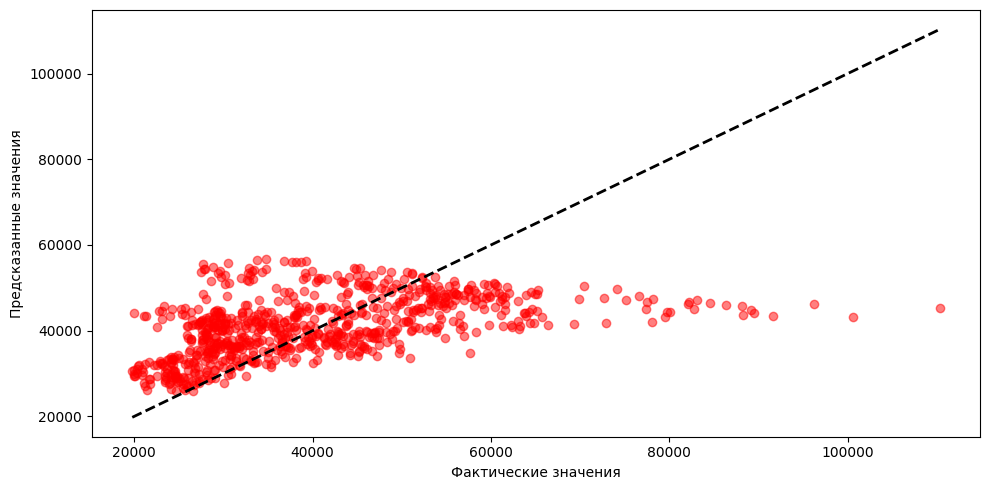

In [ ]:
linear_preds_test = linear_model.predict(X_test)
visual(y_test, linear_preds_test)

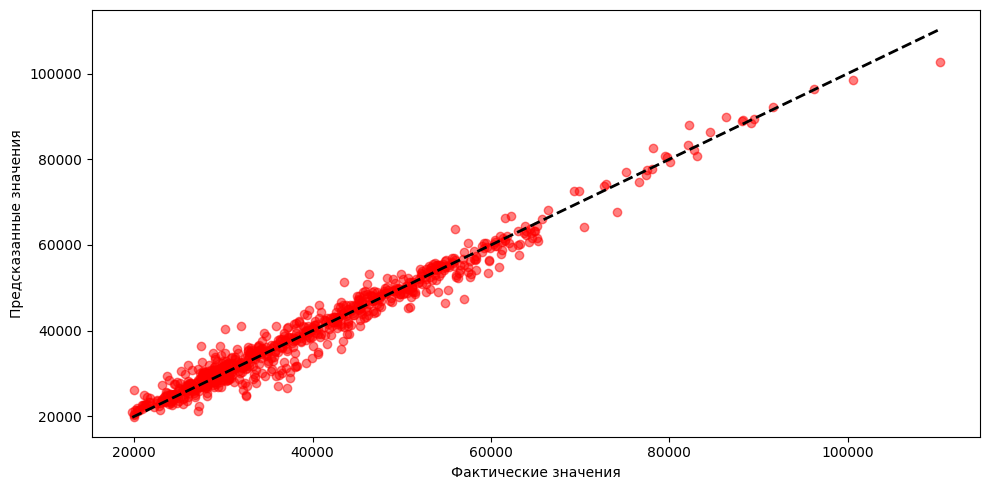

In [ ]:
rf_preds_test = rf_model.predict(X_test)
visual(y_test, rf_preds_test)

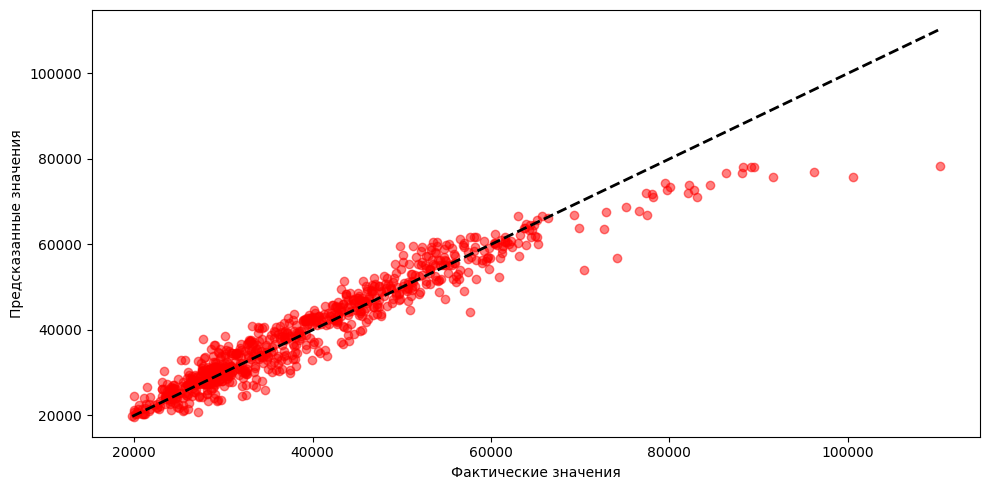

In [ ]:
gb_preds_test = gb_model.predict(X_test)
visual(y_test, gb_preds_test)

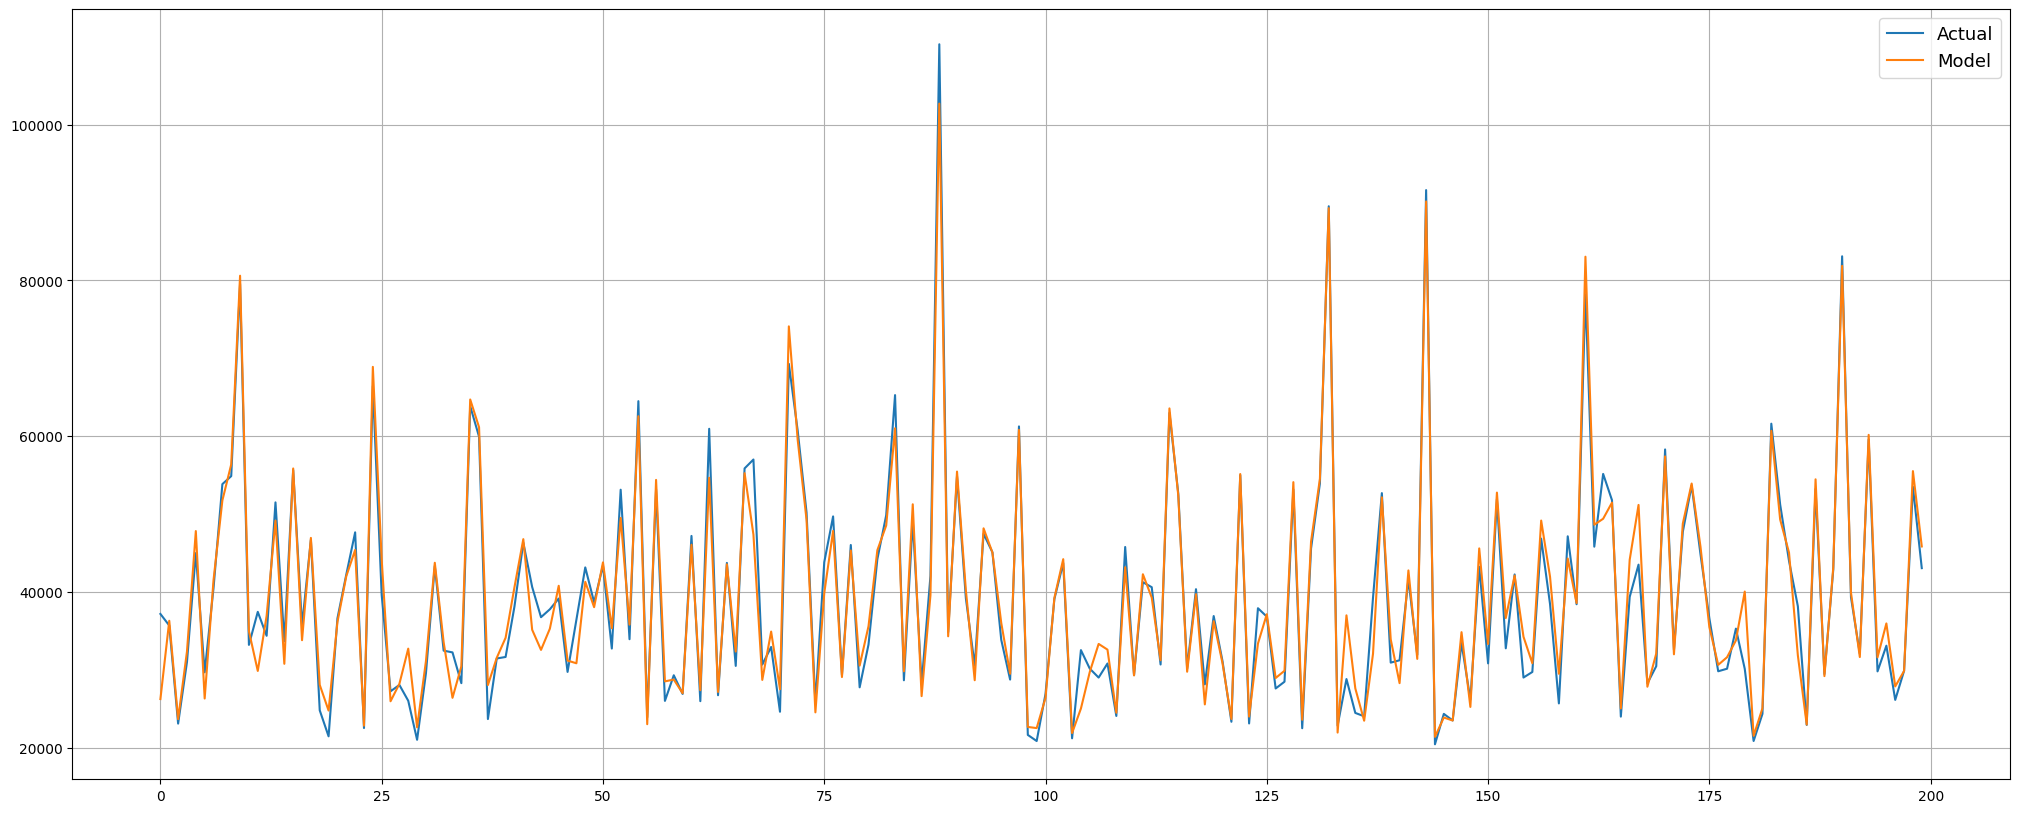

In [ ]:
rf_preds_test = rf_model.predict(X_test)
plt.figure(figsize=(25, 10))
plt.plot(np.array(y_test[-200:]), label = "Actual")
plt.plot(rf_preds_test[-200:], label = "Model")
plt.grid(True)
plt.legend(loc="best", fontsize=13);

# NLP

In [ ]:
!pip install catboost
!pip install ipywidgets  # визуализация
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
!pip install pyarrow
!pip install datasets

In [ ]:
import numpy as np
import pandas as pd
import gensim.downloader
from gensim.models import Word2Vec

import torch
from torch import nn
import datasets
from datasets import set_caching_enabled
set_caching_enabled(False)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report

In [ ]:
from datasets import load_dataset
data = load_dataset("dair-ai/emotion", trust_remote_code=True)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.jsonl to train.jsonl


In [ ]:
import json

file_path = 'train.jsonl'
data = []

with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))

Имеет текст и метку

In [ ]:
data['train'][2]

{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}

Оценим баланс классов

In [ ]:
unique_labels, counts = np.unique(data['train']['label'], return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Значение {label}: {count}")

Значение 0: 4666
Значение 1: 5362
Значение 2: 1304
Значение 3: 2159
Значение 4: 1937
Значение 5: 572


In [ ]:
X = dataset['train']['text']
y = dataset['train']['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## Балансировка данных

In [ ]:
from sklearn.utils import resample

class_0 = data['train'][data['train']['label'] == 0]
class_1 = data['train'][data['train']['label'] == 1]
class_2 = data['train'][data['train']['label'] == 2]
class_3 = data['train'][data['train']['label'] == 3]
class_4 = data['train'][data['train']['label'] == 4]
class_5 = data['train'][data['train']['label'] == 5]

max_class_size = max(len(class_0), len(class_1), len(class_2),len(class_3),len(class_4),len(class_5))
class_0_oversampled = resample(class_0, replace=True, n_samples=max_class_size)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_class_size)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_class_size)
class_3_oversampled = resample(class_3, replace=True, n_samples=max_class_size)
class_4_oversampled = resample(class_4, replace=True, n_samples=max_class_size)
class_5_oversampled = resample(class_5, replace=True, n_samples=max_class_size)

# Объединение в один набор данных
oversampled_data = np.vstack((class_0_oversampled, class_1_oversampled, class_2_oversampled, class_3_oversampled, class_4_oversampled, class_5_oversampled ))

In [ ]:
from imblearn.over_sampling import SMOTE

class_0 = data['train']['vector'][data['train']['label'] == 0]
# y_0 = data['train']['label'][data['train']['label'] == 0]
y_0 = [0]*4666
class_1 = data['train']['vector'][data['train']['label'] == 1]
y_1 = data['train']['label'][data['train']['label'] == 1]
class_2 = data['train']['vector'][data['train']['label'] == 2]
y_2 = data['train']['label'][data['train']['label'] == 2]
class_3 = data['train']['vector'][data['train']['label'] == 3]
y_3 = data['train']['label'][data['train']['label'] == 3]
class_4 = data['train']['vector'][data['train']['label'] == 4]
y_4 = data['train']['label'][data['train']['label'] == 4]
class_5 = data['train']['vector'][data['train']['label'] == 5]
y_5 = data['train']['label'][data['train']['label'] == 5]

smote = SMOTE(random_state=42)
class_0_oversampled, y_resampled_0 = smote.fit_resample(class_0, y_0)

## Использование предобученных эмбеддингов

### word2vec-wiki-gigaword-200

Скачиваем предобученный word2vec

In [ ]:
word2vec = gensim.downloader.load('glove-wiki-gigaword-200') # размерность 100

[==================================================] 100.0% 252.1/252.1MB downloaded


In [ ]:
word2vec['car']

array([ 1.5682e-02,  1.9355e-01, -5.5093e-01, -7.0453e-02, -6.5923e-01,
        2.5597e-01, -3.4435e-01, -1.7964e-01,  6.3907e-01, -4.1880e-01,
        3.1996e-01,  3.3546e-01,  2.1122e-01,  4.1592e-01,  2.8599e-01,
       -2.5777e-01, -1.3341e-01, -2.5731e-01,  2.7712e-01, -3.2695e-01,
        1.1008e-01,  2.7322e+00,  4.6684e-01, -7.3542e-01,  1.1934e-01,
       -6.0756e-01,  1.8882e-01,  1.6739e-01,  7.1712e-02, -6.5601e-01,
       -5.1485e-01,  7.6970e-01, -1.6761e-02, -1.9893e-01,  2.7478e-01,
        1.5767e-01,  3.0154e-03, -3.5170e-01,  1.3830e-01,  6.0107e-01,
        1.9442e-01, -1.1802e-01, -7.5983e-01,  6.8567e-01,  3.1139e-01,
        2.6280e-01,  3.9558e-01, -6.9782e-01, -2.1649e-01, -2.9196e-01,
        2.5405e-02,  2.3887e-01,  7.7817e-01, -4.7592e-02, -2.3215e-01,
        6.1213e-02, -4.8265e-02, -2.0152e-01,  3.2679e-01, -3.4759e-01,
        9.9897e-02, -5.1759e-01, -5.9987e-01,  1.3594e-01,  9.4825e-03,
       -9.0824e-01, -1.3166e-01, -3.7136e-01, -9.6381e-02, -4.37

In [ ]:
word2vec.most_similar('car')

[('vehicle', 0.8630837798118591),
 ('truck', 0.8597878813743591),
 ('cars', 0.837166965007782),
 ('driver', 0.8185911178588867),
 ('driving', 0.781263530254364),
 ('motorcycle', 0.7553156614303589),
 ('vehicles', 0.7462257146835327),
 ('parked', 0.74594646692276),
 ('bus', 0.737270712852478),
 ('taxi', 0.7155269384384155)]

In [ ]:
dir(word2vec)

In [ ]:
word2vec.most_similar(positive=['woman', 'king'], negative=['man'])  # сложение и вычитание векторов

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534157752991),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.631171703338623),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

In [ ]:
word2vec.similarity('food', 'meals')  # косинусное расстояние

0.6630423

In [ ]:
word2vec.most_similar('food')  # наиболее похожие слова

[('foods', 0.7469059824943542),
 ('supplies', 0.7264691591262817),
 ('products', 0.7225049138069153),
 ('meat', 0.7138239145278931),
 ('supply', 0.6732637882232666),
 ('feed', 0.670415461063385),
 ('medicines', 0.6687097549438477),
 ('meals', 0.6630422472953796),
 ('coffee', 0.6627735495567322),
 ('goods', 0.6610530614852905)]

In [ ]:
# усреднение слов: каждую строку разбиваем на токены, получили их эмбеддинги, после чего просуммировали и усреднили по всему тексту
def get_sentence_vector(row):
    token_list = row['text'].split()
    vector = np.zeros(shape=(word2vec.vector_size,))
    for token in token_list:
        vector += word2vec[token] if token in word2vec else np.zeros(shape=(word2vec.vector_size,))
    vector /= len(token_list)
    return {'vector' : vector}

data = data.map(get_sentence_vector)
data = data.with_format("np", columns=["vector", 'label'], output_all_columns=True)  # преобразуем тип в np для удобства

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
data['train'][1]

{'label': 0,
 'vector': array([-0.10819243,  0.39654505,  0.54576164, -0.4109332 , -0.20851533,
         0.44829953, -0.20153917,  0.23687781,  0.10910575, -0.18210982,
         0.2060769 ,  0.20473248,  0.27673677, -0.04398833,  0.18915081,
        -0.40043795,  0.07225038,  0.20714438, -0.36893952,  0.33864814,
         0.29750332,  0.33502194,  0.20002662, -0.14188723,  0.13761227,
         0.09512985, -0.18422295, -0.43103704,  0.2956089 , -0.23241448,
        -0.07600595,  0.45769933,  0.1442699 ,  0.10472366,  0.07061943,
         0.32169375, -0.18808334,  0.2911765 ,  0.15885176, -0.26377603,
        -0.46372318, -0.0743679 ,  0.06895631, -0.48736125, -0.20897353,
        -0.08114539,  0.21946147, -0.10597652,  0.01762071, -0.79229885,
         0.04746419, -0.17574152,  0.21602829,  1.0285362 , -0.2448309 ,
        -2.1016595 ,  0.06388433, -0.13837053,  1.1754291 ,  0.42866775,
         0.077143  ,  0.9013213 , -0.49611828,  0.03365865,  0.5460124 ,
         0.05764272,  0.6502

###  GloVe-twitter-25

In [ ]:
word2vec_2 = gensim.downloader.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [ ]:
def get_sentence_vector(row):
    token_list = row['text'].split()
    vector = np.zeros(shape=(word2vec_2.vector_size,))
    for token in token_list:
        if token in word2vec_2:
            vector += word2vec_2[token]
    vector /= len(token_list)
    return {'vector' : vector}

data = data.map(get_sentence_vector)
data = data.with_format("numpy", columns=["vector", 'label'], output_all_columns=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

## Обучение классификатора

In [ ]:
rf = RandomForestClassifier()
rf.fit(data['train']['vector'], data['train']['label'].reshape(-1))
predictions = rf.predict(data['validation']['vector'])

In [ ]:
print(classification_report(data['validation']['label'].reshape(-1), predictions))

              precision    recall  f1-score   support

           0       0.43      0.68      0.52       550
           1       0.54      0.83      0.65       704
           2       0.25      0.01      0.01       178
           3       0.46      0.04      0.08       275
           4       0.44      0.03      0.06       212
           5       0.00      0.00      0.00        81

    accuracy                           0.49      2000
   macro avg       0.35      0.26      0.22      2000
weighted avg       0.44      0.49      0.39      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(data['train']['vector'], data['train']['label'].reshape(-1))
predictions = model.predict(data['validation']['vector'])

print(classification_report(data['validation']['label'].reshape(-1), predictions))

              precision    recall  f1-score   support

           0       0.54      0.69      0.61       550
           1       0.63      0.82      0.71       704
           2       0.48      0.16      0.24       178
           3       0.54      0.32      0.40       275
           4       0.54      0.37      0.44       212
           5       0.62      0.06      0.11        81

    accuracy                           0.58      2000
   macro avg       0.56      0.40      0.42      2000
weighted avg       0.57      0.58      0.54      2000



In [ ]:
model = RandomForestClassifier(max_depth = None, min_samples_split = 4, n_estimators = 250)
model.fit(data['train']['vector'], data['train']['label'].reshape(-1))
predictions = model.predict(data['validation']['vector'])

print(classification_report(data['validation']['label'].reshape(-1), predictions))

              precision    recall  f1-score   support

           0       0.46      0.71      0.55       550
           1       0.54      0.86      0.66       704
           2       0.00      0.00      0.00       178
           3       0.81      0.06      0.11       275
           4       0.58      0.05      0.10       212
           5       0.00      0.00      0.00        81

    accuracy                           0.51      2000
   macro avg       0.40      0.28      0.24      2000
weighted avg       0.49      0.51      0.41      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data['train'][data['train']['label'] == 5]

{'label': array([0, 0, 0, ..., 0, 0, 0]),
 'vector': array([[ 0.04297769,  0.45616   , -0.008575  , ..., -0.3933725 ,
          0.63422   , -0.2521525 ],
        [ 0.04297769,  0.45616   , -0.008575  , ..., -0.3933725 ,
          0.63422   , -0.2521525 ],
        [ 0.04297769,  0.45616   , -0.008575  , ..., -0.3933725 ,
          0.63422   , -0.2521525 ],
        ...,
        [ 0.04297769,  0.45616   , -0.008575  , ..., -0.3933725 ,
          0.63422   , -0.2521525 ],
        [ 0.04297769,  0.45616   , -0.008575  , ..., -0.3933725 ,
          0.63422   , -0.2521525 ],
        [ 0.04297769,  0.45616   , -0.008575  , ..., -0.3933725 ,
          0.63422   , -0.2521525 ]], dtype=float32),
 'text': ['i didnt feel humiliated',
  'i didnt feel humiliated',
  'i didnt feel humiliated',
  'i didnt feel humiliated',
  'i didnt feel humiliated',
  'i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'i didnt

In [ ]:
!pip install catboost

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

models = [
    ('lr', LogisticRegression(random_state=21)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='hist')),
    ('svc', SVC(kernel='linear', probability=True)),
    ('catboost', CatBoostClassifier(verbose=0))
]

voting_clf = VotingClassifier(estimators=models, voting='hard')
voting_clf.fit(X_train, y_train)


predictions = voting_clf.predict(data['validation']['vector'])

In [ ]:
print(classification_report(data['validation']['label'].reshape(-1), predictions))

## Hyperopt не заработал

In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from hyperopt.pyll import scope
from functools import partial
from sklearn.model_selection import  cross_val_score, GridSearchCV, StratifiedKFold

In [ ]:
search_space = {'xgb': {
                'params': {
                          'max_depth': scope.int(hp.uniform(label='max_depth', low=2, high=16)),
                          'optimizer': hp.choice('optimizer', ['adam', 'rms']),
                          'min_child_weight': scope.int(hp.quniform('min_child_weight', 2, 40, 1)),
                          'colsample_bytree': hp.uniform('colsample_by_tree', 0.3, 1.0),
                          'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.5)),
                          'n_estimators': scope.int(hp.uniform('n_estimators',100, 1000)),
                          'gamma': hp.uniform('gamma', 0.2, 1.0)
                          }
                }
                }

# метрики максимизации
score_list=['roc_auc','precision','f1']

def objective(parameters, X_train, y_train, r_state=23):
  model = XGBClassifier(random_state=r_state, **parameters['params'])
  kf = StratifiedKFold(n_splits=7)
  score = cross_val_score(estimator=model, X=X_norm, y=df1["Выжил"],
                          cv=kf, scoring=score_list[2], n_jobs=-1)

  return {'loss': -score.mean(), 'params': parameters['params'], 'status': STATUS_OK}


trials = Trials()
best = fmin(fn=partial(objective, data['train']['vector'], data['train']['label'].reshape(-1), r_state=80),
            space=search_space['xgb'],
            algo=tpe.suggest,
            max_evals=300,
            trials=trials,
            show_progressbar=True
    )

In [ ]:
def df_results(hp_results):
    """
    Отображаем результаты hyperopt в формате DataFrame и выбираем лучшую понравившуюся комбинацию параметров
    """

    results = pd.DataFrame([{**x, **x['params']} for x in  hp_results])
    results.drop(labels=['status', 'params'], axis=1, inplace=True)
    results.loc[:, 'loss'] = results['loss'] * (-1)
    results.sort_values(by=['loss'], ascending=False, inplace=True, ignore_index=True)
    return results

results_hp = df_results(trials.results)
results_hp.head(20)

## Grid Search не заработал

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier()
param_xgb = {'max_depth': [2, 3, 4, 5], "min_child_weight": [1,3,5],
          "colsample_bytree":[0.3, 0.5, 0.7], 'n_estimators': [100, 200, 300, 500, 1000]}

xgb_cv = GridSearchCV(xgb, param_xgb, scoring='f1', cv=5)
xgb_cv.fit(data['train']['vector'], data['train']['label'].reshape(-1))

In [ ]:
# выводим лучшие параметры
xgb_cv.best_params_

In [ ]:
xgb = XGBClassifier(tree_method = 'gpu_hist',colsample_bytree= 0.5,max_depth= 2,min_child_weight= 1, n_estimators= 100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree_param = {'criterion':['gini','entropy'],'max_depth':[2,3,5,8,10,12,14,15], 'min_samples_split':[2,4,5,10,15]}
tree_cv = GridSearchCV(tree, tree_param, scoring='', cv=5, n_jobs=-1)
tree_cv.fit(data['train']['vector'], data['train']['label'].reshape(-1))

In [ ]:
data['train']['label'].reshape(-1)

array([0, 0, 3, ..., 1, 3, 0])

In [ ]:
tree_cv.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}